## 1. Regression Analysis

The goal of regression analysis is to provide accurate mapping from one or more input variables (called features in machine learning or exogenous variables in econometrics) to a continuous output variable (called the label or target in machine learning and the endogenous variable in econometrics). More about linear regression [here](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/)

In this project we are going to demonstrate the application of different forms of regression along with some coding implemantations of it, for each of its cases like with a *linear regression* with single variable, multivariable *lasso regression* etc, over a dataset containg housing prices. More specifically we are going to build a model that predicts prices using one or more features.  
So without any other delay, let us begin! First we import our basic libraries and create our dataframe.


In [1]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('./datasets/house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 2. Extracting Features

This dataset comes from [kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction), by clicking you can get it for yourselves. We can see that our dataset contains different types of data like `int64`, `float64` and one `object` (in the `date` column). As we  will see in this step, we will convert the `int64` types into `float64` types for convenience and precision in our caclulations later on.

The next step is to form a subset containing our soon to be features that will be used in our evaluation. So for our *feature extraction* we will keep each column from our dataset <u>**except**</u> for our `price`, `date` and `id` columns.

In [2]:
# Extract features
X = df.drop(['price', 'date', 'id'], axis=1)

# Convert all features into float
X = X.astype(float)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


## 3. Extracting Target Variable

Now we are going to extract the target variable, that is the variable upon which our predictions will be made, which is the `price` column. Further more we are going to turn it into logarithmic scale to facilate our calculations.

Here are we are going to focus on how a single feature, namely the `sqft_living`, and try to see how the livable space (meaning not the store room etc) affect the price of the focus. We will make a scatter plot to demonstrate any potential relationships and since scatter plots will be our main tool we will define a function that can adapt in our different following scenarios.

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price, dtype: float64


<AxesSubplot:xlabel='sqft_living', ylabel='log_price'>

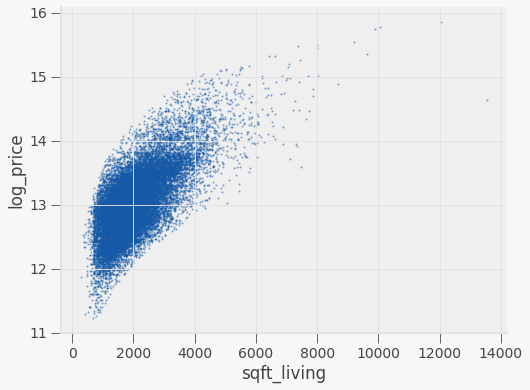

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create ploting template from the qeds library
import qeds
qeds.themes.mpl_style()
plotly_template = qeds.themes.plotly_template()
colors = qeds.themes.COLOR_CYCLE


# Extract 'y' in a log scale also include it as column
y = np.log(df['price'])
df["log_price"] = y
print(y.head())

# Scatterplot function
def var_scatter(df, ax=None, var="sqft_living"):
    """Default behavior is a simple axes and comparing variable 'y' against 'sqft_living'.
       This default behavior can be modified to include different axes and variables"""
    
    if ax is None:
        _, ax = plt.subplots(figsize=(8,6))
    
    df.plot.scatter(x=var, y="log_price", ax=ax, alpha=0.35, s=1.5)
    return ax


# Plot 'y' against 'sqft_living'
var_scatter(df)


## 4. Linear Regression - Fitting the Model

Let us now proceed into the cornerstone of Regression, the [*Linear Regression*](https://en.wikipedia.org/wiki/Linear_regression) ("LR" from now on) and examine how the livable space affects price.

From our previous scatterplot we already have a general notion that *price* and *livable space* are positively correlated, in simple terms if the one goes up the other one follows allong on the same direction. Here, our LR can be annotated as follows:

$$log(price) = \beta_0 + \beta_1 \cdot sqft\_living + \epsilon$$

where $\beta_0$ and $\beta_1$ are the *parameters* or *weights* . These weights are coefficients that define the performance of a Machine Learning algorithm.

the $\epsilon$ term is the *error* term and it is the number representing the difference between our predictions and the actual data points. Usually our goal is to keep this term as small as possible, leading to more accurate and reliable predictions.

One metric for the amount of error is the *Mean Square Error* (MSE) function and the LR algorithm will choose the parameters that minimize the MSE. Here is the mathematical definition of it:

$$\frac{1}{N}\sum_{i=1}^\infty =  [log(price_i) - (\beta_0 + \beta_1 \cdot {sqft\_living})]^2$$

As the name "linear" implies, the output is a straight line that passes as close on our points of the scatterplot as possible.  
So now let us train a LR mode using the capabilities of linear models in the [scikit learn](https://scikit-learn.org/stable/modules/linear_model.html) library and plot the results!

The resulted model is:
	 log(price) = 12.2185 + 0.0004 sqft_living


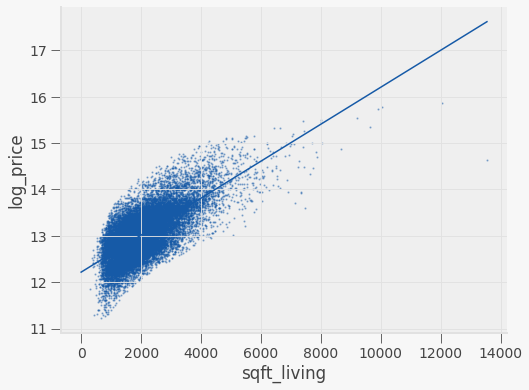

In [36]:
from sklearn.linear_model import LinearRegression

# Instantiate model
sqft_lr_model = LinearRegression()

# Fit it into our data
sqft_lr_model.fit(X[['sqft_living']], y)

# Extract the parameters
beta0 = sqft_lr_model.intercept_
beta1 = sqft_lr_model.coef_[0]

print("The resulted model is:")
print(f"\t log(price) = {beta0:.4f} + {beta1:.4f} sqft_living")

# Plot the previous scatter combined with the model
ax = var_scatter(df)
x = np.array([0, df['sqft_living'].max()])
ax.plot(x, beta0 + beta1 * x)